In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



---


 
# **IMPORTING IMPORTANT LIBRARIES AND LOADING DATASET**
---



---



In [ ]:
import torch
import torch.nn as nn
import math
from scipy.integrate import odeint

from IPython import display
from torch.autograd import Variable
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from torch.nn.parameter import Parameter

from matplotlib import colors as mcolors
from IPython import display
#dtype = torch.cuda.FloatTensor

colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())
dtype= torch.FloatTensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device
torch.cuda.is_available()

False

In [ ]:
%cd '/content/drive/MyDrive/AIMS ESSAY/Datasets'
#%cd '/content/drive/MyDrive/EssayPhase_AIMSCmr/Research_Phase_Batch2122/Alice/Compute/Datasets'

[Errno 2] No such file or directory: '/content/drive/MyDrive/AIMS ESSAY/Datasets'
/content


In [ ]:
if device.type == 'cpu':
    dtype= torch.FloatTensor
else:
    dtype= torch.cuda.FloatTensor

In [ ]:
#df_new= pd.read_csv('/content/drive/MyDrive/AIMS ESSAY/Alice/Compute/Datasets/five_norm_path_4616211.csv')
df_new= pd.read_csv('/content/drive/MyDrive/AIMS ESSAY/Alice/Compute/Datasets/f_norm_path_4616211.csv')
df_new.head(6)


,Speed,TravelTime,linkId,Id,Date,Time,Month,Day,Weekday,week,DateTime,Minutes,norm_speed,norm_travelTime
0,59.03,64,4616356,3946540,2016-01-01,00:01:02,1,1,Friday,53,2016-01-01 00:01:02,1,0.129061,-0.041343
1,62.14,61,4616356,3946973,2016-01-01,00:16:02,1,1,Friday,53,2016-01-01 00:16:02,16,0.160161,-0.044343
2,60.27,63,4616356,3947346,2016-01-01,00:31:02,1,1,Friday,53,2016-01-01 00:31:02,31,0.141461,-0.042343
3,52.82,71,4616356,3947777,2016-01-01,00:46:02,1,1,Friday,53,2016-01-01 00:46:02,46,0.066961,-0.034343
4,52.82,71,4616356,3948158,2016-01-01,01:01:02,1,1,Friday,53,2016-01-01 01:01:02,1,0.066961,-0.034343
5,55.30,69,4616356,3948533,2016-01-01,01:16:01,1,1,Friday,53,2016-01-01 01:16:01,16,0.091761,-0.036343


In [ ]:
#def interval_extraction(df,interval):
  #ETRACTION OF THE MONTHLY DATA
  #df1=df.loc[df['Month']==month]
  #HOURLY SUBSAMPLING
  #df1=df[::interval]
  #return df1

#df_new=interval_extraction(df_new,4)
#df_new.head(6)

In [ ]:
from datetime import datetime



df_new['Date']= pd.to_datetime(df_new['Date'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32726 entries, 0 to 32725
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Speed            32726 non-null  float64       
 1   TravelTime       32726 non-null  int64         
 2   linkId           32726 non-null  int64         
 3   Id               32726 non-null  int64         
 4   Date             32726 non-null  datetime64[ns]
 5   Time             32726 non-null  object        
 6   Month            32726 non-null  int64         
 7   Day              32726 non-null  int64         
 8   Weekday          32726 non-null  object        
 9   week             32726 non-null  int64         
 10  DateTime         32726 non-null  object        
 11  Minutes          32726 non-null  int64         
 12  norm_speed       32726 non-null  float64       
 13  norm_travelTime  32726 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int6



---

---

# **SECTIONING THE DATA INTO SEASONS**

---

---

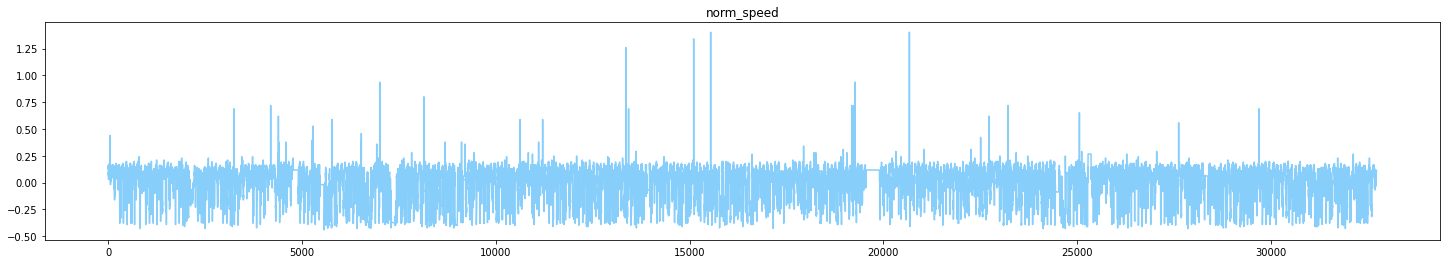

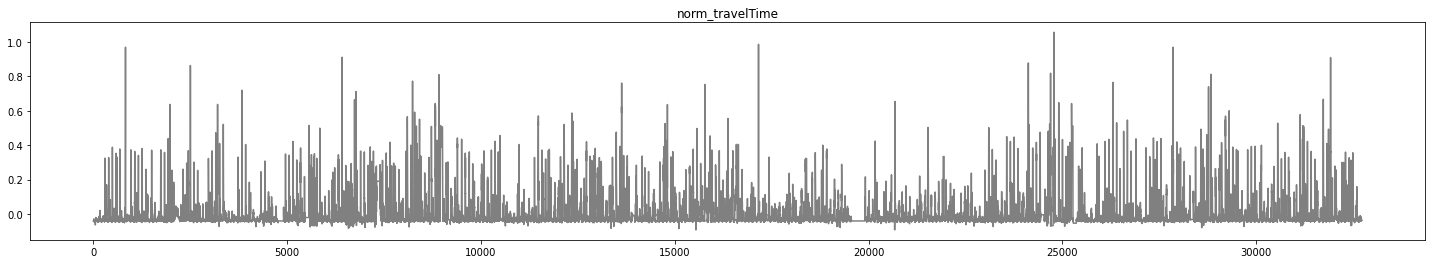

In [ ]:
for col in df_new.columns[-2:]:
    plt.figure(figsize=(25,4))
    plt.plot( df_new[col], color=colors[np.random.randint(1,100,1)[0]])
    plt.title(col)

In [ ]:
#Convert date and time to datetime

In [ ]:
all_data = np.array(df_new.loc[:,list(df_new.columns)[12:]])
all_data.shape

(32726, 2)

In [ ]:
all_data

array([[ 0.12906095, -0.04134263],
       [ 0.16016095, -0.04434263],
       [ 0.14146095, -0.04234263],
       ...,
       [ 0.11666095, -0.04034263],
       [ 0.11046095, -0.03934263],
       [ 0.09796095, -0.03834263]])

In [ ]:
def labeling_seasons( start_date , end_date):
    after_start_date = df_new["Date"] >= start_date
    before_end_date = df_new["Date"] <= end_date
    between_two_dates = after_start_date & before_end_date
    #filtered_dates = df_new.loc[between_two_dates]
    return between_two_dates

In [ ]:
start_date = "2016-01-01"
end_date = "2016-05-01"     
df_new2 = df_new[labeling_seasons( start_date , end_date)]
df_new2

,Speed,TravelTime,linkId,Id,Date,Time,Month,Day,Weekday,week,DateTime,Minutes,norm_speed,norm_travelTime
0,59.03,64,4616356,3946540,2016-01-01,00:01:02,1,1,Friday,53,2016-01-01 00:01:02,1,0.129061,-0.041343
1,62.14,61,4616356,3946973,2016-01-01,00:16:02,1,1,Friday,53,2016-01-01 00:16:02,16,0.160161,-0.044343
2,60.27,63,4616356,3947346,2016-01-01,00:31:02,1,1,Friday,53,2016-01-01 00:31:02,31,0.141461,-0.042343
3,52.82,71,4616356,3947777,2016-01-01,00:46:02,1,1,Friday,53,2016-01-01 00:46:02,46,0.066961,-0.034343
4,52.82,71,4616356,3948158,2016-01-01,01:01:02,1,1,Friday,53,2016-01-01 01:01:02,1,0.066961,-0.034343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11346,52.82,71,4616356,8601161,2016-05-01,22:50:44,5,1,Sunday,17,2016-05-01 22:50:44,50,0.066961,-0.034343
11347,55.30,69,4616356,8601568,2016-05-01,23:05:44,5,1,Sunday,17,2016-05-01 23:05:44,5,0.091761,-0.036343
11348,55.30,69,4616356,8601920,2016-05-01,23:20:44,5,1,Sunday,17,2016-05-01 23:20:44,20,0.091761,-0.036343
11349,60.27,63,4616356,8602308,2016-05-01,23:35:44,5,1,Sunday,17,2016-05-01 23:35:44,35,0.141461,-0.042343


In [ ]:
def morning_hours(start_time, end_time):
    after_start_time = df_new["Time"] >= start_time
    before_end_time = df_new["Time"] <= end_time
    between_two_times = after_start_time & before_end_time
    #filtered_dates = df_new.loc[between_two_dates]
    return between_two_times

In [ ]:
start_time = "06:00:00"
end_time = "09:00:00"  
df_new3 = df_new2[morning_hours( start_time , end_time)]
df_new3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Speed,TravelTime,linkId,Id,Date,Time,Month,Day,Weekday,week,DateTime,Minutes,norm_speed,norm_travelTime
24,57.79,65,4616356,3956064,2016-01-01,06:01:01,1,1,Friday,53,2016-01-01 06:01:01,1,0.116661,-0.040343
25,55.92,67,4616356,3956451,2016-01-01,06:16:01,1,1,Friday,53,2016-01-01 06:16:01,16,0.097961,-0.038343
26,59.03,64,4616356,3956841,2016-01-01,06:31:02,1,1,Friday,53,2016-01-01 06:31:02,31,0.129061,-0.041343
27,60.27,63,4616356,3957274,2016-01-01,06:46:02,1,1,Friday,53,2016-01-01 06:46:02,46,0.141461,-0.042343
28,62.14,61,4616356,3957646,2016-01-01,07:01:02,1,1,Friday,53,2016-01-01 07:01:02,1,0.160161,-0.044343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11206,57.79,65,4616356,1115284,2016-04-30,08:50:42,4,30,Saturday,17,2016-04-30 08:50:42,50,0.116661,-0.040343
11287,57.79,65,4616356,8577782,2016-05-01,08:05:44,5,1,Sunday,17,2016-05-01 08:05:44,5,0.116661,-0.040343
11288,57.17,66,4616356,8578222,2016-05-01,08:20:44,5,1,Sunday,17,2016-05-01 08:20:44,20,0.110461,-0.039343
11289,60.27,63,4616356,8578607,2016-05-01,08:35:44,5,1,Sunday,17,2016-05-01 08:35:44,35,0.141461,-0.042343


In [ ]:
df_new3.tail(5)

,Speed,TravelTime,linkId,Id,Date,Time,Month,Day,Weekday,week,DateTime,Minutes,norm_speed,norm_travelTime
11206,57.79,65,4616356,1115284,2016-04-30,08:50:42,4,30,Saturday,17,2016-04-30 08:50:42,50,0.116661,-0.040343
11287,57.79,65,4616356,8577782,2016-05-01,08:05:44,5,1,Sunday,17,2016-05-01 08:05:44,5,0.116661,-0.040343
11288,57.17,66,4616356,8578222,2016-05-01,08:20:44,5,1,Sunday,17,2016-05-01 08:20:44,20,0.110461,-0.039343
11289,60.27,63,4616356,8578607,2016-05-01,08:35:44,5,1,Sunday,17,2016-05-01 08:35:44,35,0.141461,-0.042343
11290,59.03,64,4616356,8578983,2016-05-01,08:50:44,5,1,Sunday,17,2016-05-01 08:50:44,50,0.129061,-0.041343


In [ ]:
all_data = np.array(df_new3.loc[:,list(df_new3.columns)[12:]])
df=df_new3

In [ ]:
all_data

array([[ 0.11666095, -0.04034263],
       [ 0.09796095, -0.03834263],
       [ 0.12906095, -0.04134263],
       ...,
       [ 0.11046095, -0.03934263],
       [ 0.14146095, -0.04234263],
       [ 0.12906095, -0.04134263]])

In [ ]:
from numpy import array
def split_sequence(sequence, horizon):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + horizon
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
horizon = 24
X, y= split_sequence(df['norm_speed'].values.reshape(len(df['norm_speed']) , 1), horizon)

In [ ]:
X.shape

(1453, 24, 1)

In [ ]:
y.shape

(1453, 1)



---



---


## **Split into training and testing set**


---



---



---



In [ ]:
from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

In [ ]:
X_train.shape

(1162, 24, 1)

In [ ]:
X_test.shape

(291, 24, 1)

In [ ]:
y_test.shape

(291, 1)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1162, 24, 1) (291, 24, 1) (1162, 1) (291, 1)


In [ ]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import Dropout





---





---


#**RNN MODEL**


---

---



---





In [ ]:
from keras.layers import SimpleRNN

rnn_model= Sequential()
rnn_model.add(SimpleRNN(100, activation='tanh' , return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(SimpleRNN(100, activation= 'tanh' , return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(SimpleRNN(49, activation='tanh' , return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(SimpleRNN(49, activation='tanh'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss= 'mean_squared_error')
history_rnn=rnn_model.fit(X_train, y_train, epochs=200, batch_size=256)




---



---



---


## **RNN MODEL LOSS AGAINST EPOCHS**


---



---



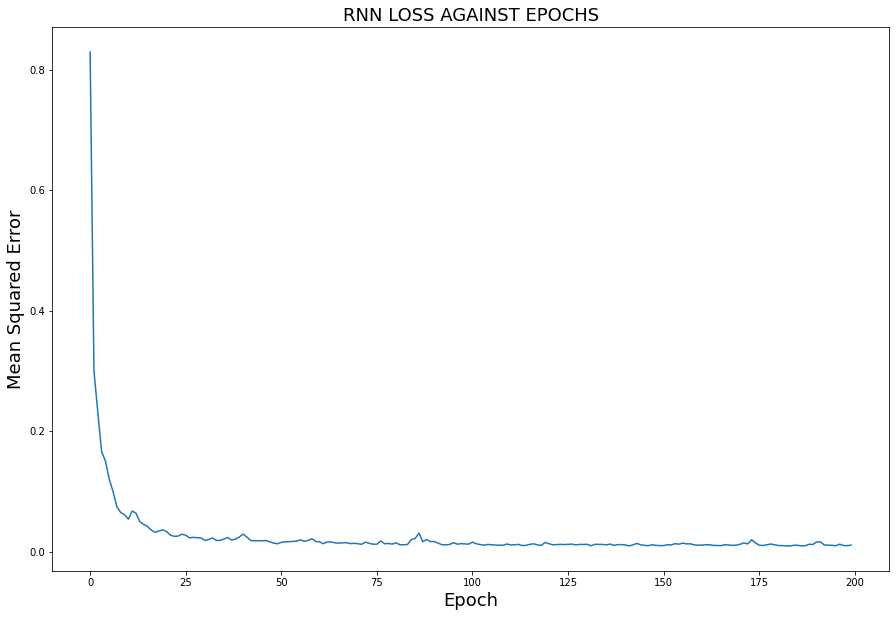

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(history_rnn.history['loss'])
plt.title('RNN LOSS AGAINST EPOCHS', fontsize=18)
plt.ylabel('Mean Squared Error', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
#plt.savefig('lstm2plot.png')
plt.show()



---



---



---


## **RNN performance metrics evaluation**

---



---



In [ ]:
pred_rnn=rnn_model.predict(X_test)

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    #me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return ({'MAPE':mape, 'MAE': mae, 
            'MPE': mpe, 'RMSE':rmse})
forecast_accuracy(pred_rnn, y_test)

{'MAE': 0.06933777797041309,
 'MAPE': 0.7523585168184471,
 'MPE': -0.3457867491120041,
 'RMSE': 0.09609971664107188}



---



---
## **RNN GENERALIZATION PLOT**


<Figure size 432x288 with 0 Axes>

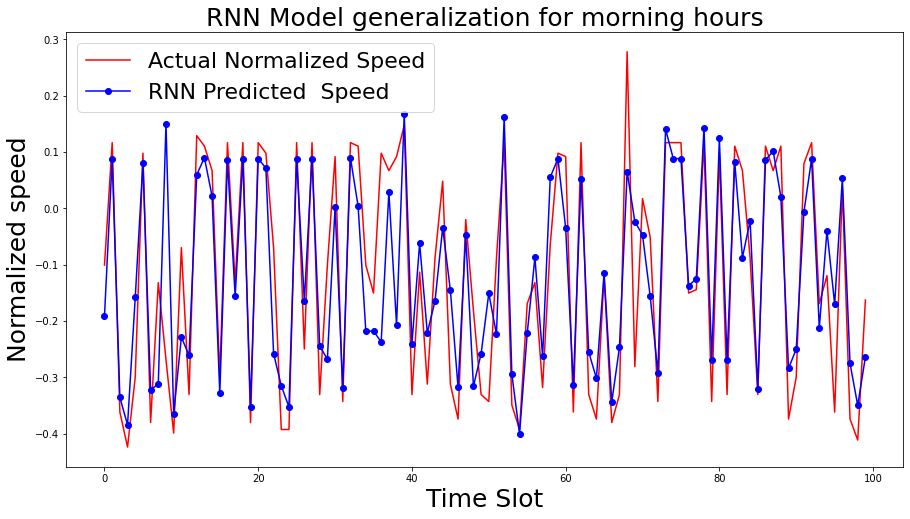

In [ ]:
from matplotlib import pyplot as plt    

fig = plt.figure()


plt.rc('legend',fontsize=22) 
#plot of test and predict
plt.figure(figsize=(15, 8))
plt.plot(y_test[:100], color='red',  label='Actual Normalized Speed')
plt.plot(pred_rnn[:100],'b-o', label='RNN Predicted  Speed')
plt.xlabel('Time Slot',fontsize=25)
plt.ylabel('Normalized speed', fontsize=25)
#plt.title('RNN generalization: Path 2 using 10 min interval for 4 hour forecast', fontsize=25)
plt.title('RNN Model generalization for morning hours', fontsize=25)
plt.legend()
#plt.savefig('lstm4plot.png')
plt.show()
fig.savefig('RNN GENERALIZATION.jpg')




---



---

# **LSTM MODEL**

---



---



---



In [ ]:
model= Sequential()
#adding the first LSTM layer and some dropout regularization
model.add(LSTM(100, activation='tanh' , return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(100, activation='tanh' , return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(49, activation='tanh' , return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(49, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))
#Compiling the RNN
model.compile(optimizer='adam', loss= 'mean_squared_error')
#Fitting the RNN to the training set
history=model.fit(X_train, y_train, epochs=200, batch_size=256)
history.history
#model.summary()


## **LSTM LOSS AGAINST EPOCHS**

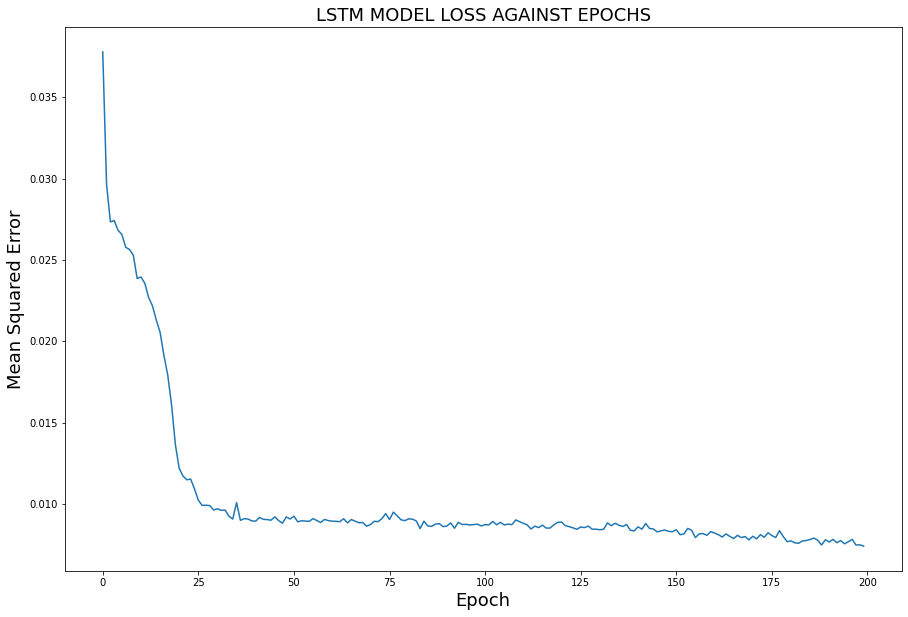

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.title('LSTM MODEL LOSS AGAINST EPOCHS', fontsize=18)
plt.ylabel('Mean Squared Error', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
#plt.savefig('lstm2plot.png')
plt.show()



---



---



---


## **GENERALIZATION OF THE LSTM MODEL**

---



---



In [ ]:
pred_lstm=model.predict(X_test)

<Figure size 432x288 with 0 Axes>

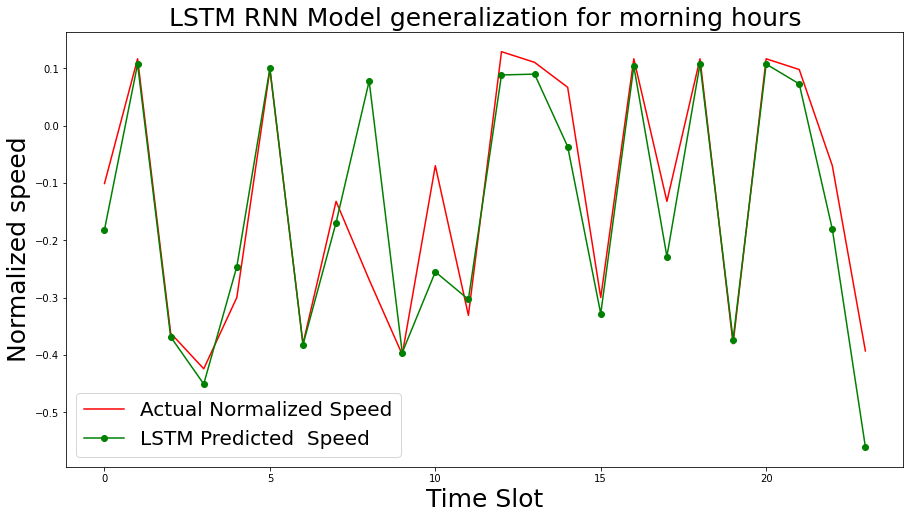

In [ ]:
from matplotlib import pyplot as plt    

fig = plt.figure()


plt.rc('legend',fontsize=20) 
#plot of test and predict
plt.figure(figsize=(15, 8))
plt.plot(y_test[:100], color='red', label='Actual Normalized Speed')
plt.plot(pred_lstm[:100], 'go-', label='LSTM Predicted  Speed')
plt.xlabel('Time Slot',fontsize=25)
plt.ylabel('Normalized speed', fontsize=25)
plt.title('LSTM RNN Model generalization for morning hours', fontsize=25)

plt.legend()
#plt.savefig('lstm4plot.png')
plt.show()
fig.savefig('LSTM GENERALIZATION.jpg')




---



---



---


## **LSTM Performance metrics evaluation**

---



---



In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    #me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return ({'MAPE':mape, 'MAE': mae, 
            'MPE': mpe, 'RMSE':rmse})
forecast_accuracy(pred_lstm, y_test)

{'MAE': 0.05837790419529184,
 'MAPE': 0.8104890934144608,
 'MPE': -0.33734952581300637,
 'RMSE': 0.08894657085722926}



---



---

# **BI-LSTM MODEL**


---

---



---





In [ ]:
from keras.layers import Bidirectional

bilstm_model= Sequential()
bilstm_model.add(Bidirectional(LSTM(100, activation='tanh' , return_sequences=True, input_shape=(X_train.shape[1],1))))
bilstm_model.add(Bidirectional(LSTM(100, activation= 'tanh' , return_sequences=True, input_shape=(X_train.shape[1],1))))
bilstm_model.add(Bidirectional(LSTM(49, activation='tanh' , return_sequences=True, input_shape=(X_train.shape[1],1))))
bilstm_model.add(Bidirectional(LSTM(49, activation='tanh')))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Dense(1))
bilstm_model.compile(optimizer='adam', loss= 'mean_squared_error')
history_bilstm=bilstm_model.fit(X_train, y_train, epochs=200, batch_size=256)





---



---



---


## **BILSTM MODEL LOSS AGAINST EPOCHS**


---



---



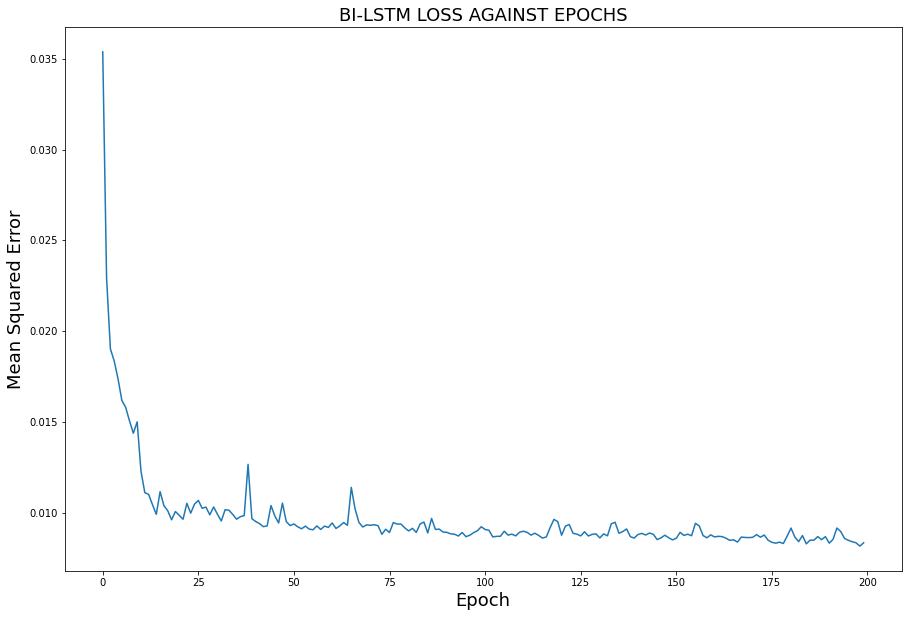

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(history_bilstm.history['loss'])
plt.title('BI-LSTM LOSS AGAINST EPOCHS', fontsize=18)
plt.ylabel('Mean Squared Error', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
#plt.savefig('lstm2plot.png')
plt.show()



---



---



---


## **BILSTM performance metrics evaluation**

---



---



In [ ]:
pred_bilstm=bilstm_model.predict(X_test)

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    #me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return ({'MAPE':mape, 'MAE': mae, 
            'MPE': mpe, 'RMSE':rmse})
forecast_accuracy(pred_bilstm, y_test)

{'MAE': 0.05897020886186769,
 'MAPE': 0.7934493746814114,
 'MPE': -0.2826374560452515,
 'RMSE': 0.09356388504461084}



---



---



---


## **GENERALIZATION OF THE BILSTM MODEL**

---



---



<Figure size 432x288 with 0 Axes>

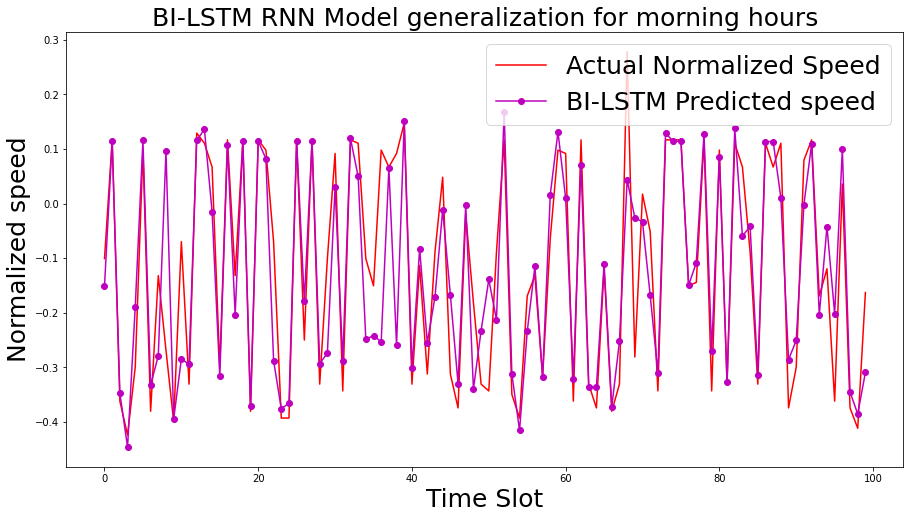

In [ ]:
from matplotlib import pyplot as plt    

fig = plt.figure()


plt.rc('legend',fontsize=25) 
#plot of test and predict
plt.figure(figsize=(15, 8))
plt.plot(y_test[:100], color='red', label='Actual Normalized Speed')
plt.plot(pred_bilstm[:100], 'm-o', label='BI-LSTM Predicted speed')
plt.xlabel('Time Slot',fontsize=25)
plt.ylabel('Normalized speed', fontsize=25)
plt.title('BI-LSTM RNN Model generalization for morning hours', fontsize=25)
plt.legend()
#plt.savefig('lstm4plot.png')
plt.show()
fig.savefig('BI-LSTM GENERALIZATION.jpg')




---



---



## **COMPARISON BETWEEN LSTM AND BILSTM MODEL**


---



---



---



<Figure size 432x288 with 0 Axes>

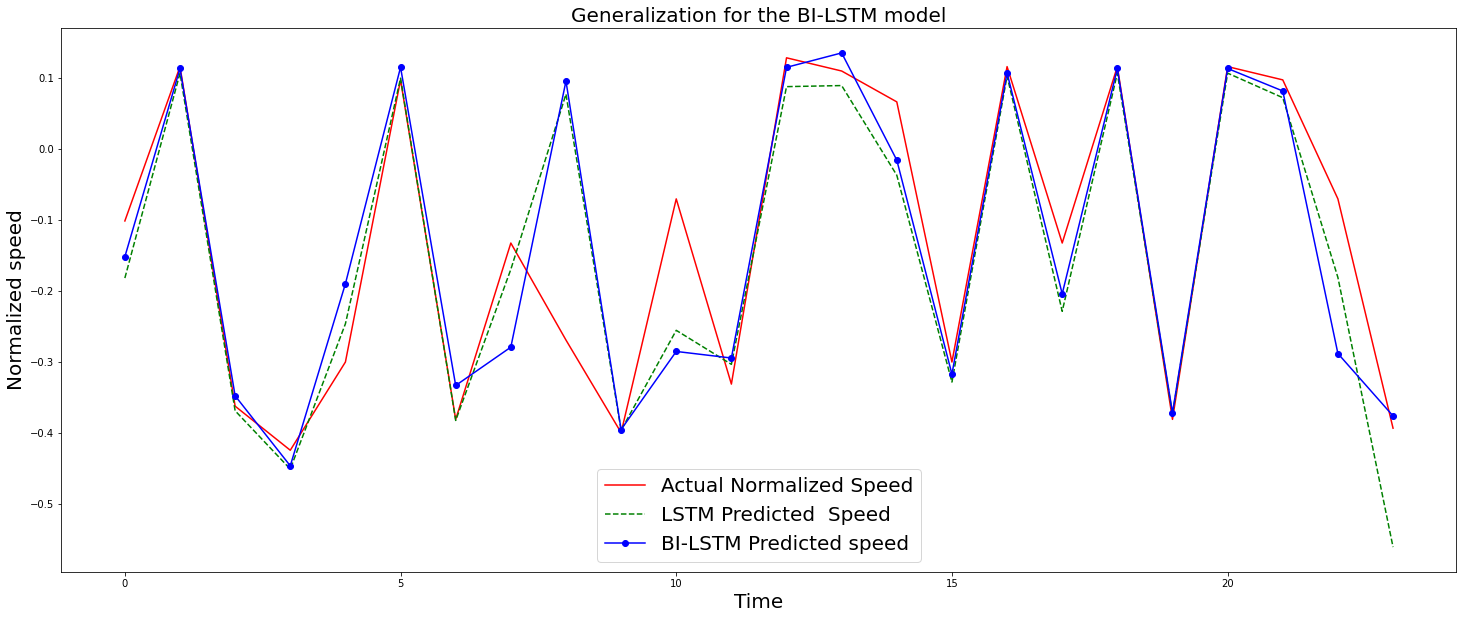

In [ ]:
from matplotlib import pyplot as plt    

fig = plt.figure()


plt.rc('legend',fontsize=20) 
#plot of test and predict
plt.figure(figsize=(25, 10))
plt.plot(y_test[:24], color='red', label='Actual Normalized Speed')
plt.plot(pred_lstm[:24], 'g--', label='LSTM Predicted  Speed')
plt.plot(pred_bilstm[:24], 'b-o', label='BI-LSTM Predicted speed')
plt.xlabel('Time',fontsize=20)
plt.ylabel('Normalized speed', fontsize=20)
plt.title('Generalization for the BI-LSTM model', fontsize=20)
plt.legend()
#plt.savefig('lstm4plot.png')
plt.show()
fig.savefig('COMPARISON OF GENERALIZATION OF MODELS.jpg')










